Start of Code

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import re

Cleaning up DataFrame and Breaking It into Two Based On Year

In [3]:
df = pd.read_csv('Salaries.csv', sep = ',', error_bad_lines = False, index_col = False, dtype ='unicode')
df = df.drop(columns = ['Id', 'Status','Notes','Agency','Benefits'])
df = df.dropna(how ='any',axis=0) 
df = df.drop(148653)
df = df.loc[~df['BasePay'].str.contains('Not Provided')]
df['BasePay'] = pd.to_numeric(df['BasePay'])
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'])
df['OtherPay'] = pd.to_numeric(df['OtherPay'])
df['TotalPay'] = pd.to_numeric(df['TotalPay'])
df['TotalPayBenefits'] = pd.to_numeric(df['TotalPayBenefits'])
question = df
question = question.drop(columns = ['EmployeeName','BasePay', 'OvertimePay','OtherPay','TotalPayBenefits'])
question2011 = question.loc[question['Year'] == '2011']
question2014 = question.loc[question['Year'] == '2014']
question2014['JobTitle2'] = question2014['JobTitle'].str.upper()
df

<ipython-input-3-db794189b0c3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question2014['JobTitle2'] = question2014['JobTitle'].str.upper()


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...
148644,Randy D Winn,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.00,0.00,2014
148645,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,2014
148647,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,2014
148648,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,2014


Checkpoint

In [5]:
df.to_csv('checkpoint_csv')

Aggregating The Two Dataframes

In [44]:
question2011_agg = question2011.groupby('JobTitle').mean().sort_values(['TotalPay'],ascending = False).reset_index()
question2011_agg

,JobTitle,TotalPay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
1,DEPUTY DIRECTOR OF INVESTMENTS,307899.460000
2,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000
3,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000
4,EXECUTIVE CONTRACT EMPLOYEE,277438.840000
...,...,...
1040,"BOARD/COMMISSION MEMBER, GROUP V",1195.904464
1041,SPECIAL ASSISTANT XIV,673.800000
1042,"BOARD/COMMISSION MEMBER, GROUP III",638.787879
1043,"BOARD/COMMISSION MEMBER, GROUP II",296.511628


In [45]:
question2014_agg = question2014.groupby('JobTitle2').mean().sort_values(['TotalPay'],ascending = False).reset_index()
question2014_agg

,JobTitle2,TotalPay
0,CHIEF INVESTMENT OFFICER,339653.700000
1,CHIEF OF POLICE,326716.760000
2,"CHIEF, FIRE DEPARTMENT",326233.440000
3,"GEN MGR, PUBLIC TRNSP DEPT",294000.180000
4,DEP CHF OF DEPT (FIRE DEPT),285575.785000
...,...,...
991,"BDCOMM MBR, GRP5,M$100/MO",1300.115926
992,SPECIAL EXAMINER,1141.172414
993,"BDCOMM MBR, GRP3,M=$50/MTG",691.904762
994,"BDCOMM MBR, GRP2,M=$25/MTG",325.000000


Merging The Two DataFrames Back Into One

In [8]:
merged = question2011_agg.merge(question2014_agg,'left',right_on = 'JobTitle2',left_on = 'JobTitle')
merged = merged.dropna(how = 'any', axis = 0)
merged['difference'] = merged['TotalPay_y'] - merged['TotalPay_x']
merged['percent_inc'] = ((merged['TotalPay_y'] / merged['TotalPay_x']) - 1) * 100



default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*1.25

mergedx = merged.sort_values('TotalPay_x',ascending = False).head(15)
mergedy = merged.sort_values('TotalPay_y', ascending = False).head(15)


merged

,JobTitle,TotalPay_x,JobTitle2,TotalPay_y,difference,percent_inc
4,EXECUTIVE CONTRACT EMPLOYEE,277438.840000,EXECUTIVE CONTRACT EMPLOYEE,278544.710000,1105.870000,0.398600
5,CHIEF OF POLICE,267992.590000,CHIEF OF POLICE,326716.760000,58724.170000,21.912610
9,PORT DIRECTOR,233357.280000,PORT DIRECTOR,252149.010000,18791.730000,8.052772
12,NURSING SUPERVISOR PSYCHIATRIC,216598.635000,NURSING SUPERVISOR PSYCHIATRIC,231393.956667,14795.321667,6.830755
17,CITY ATTORNEY,208243.120000,CITY ATTORNEY,231523.830000,23280.710000,11.179582
...,...,...,...,...,...,...
1030,RECREATION DIRECTOR,4185.114000,RECREATION DIRECTOR,4457.473333,272.359333,6.507812
1031,JUNIOR CLERK,4054.687547,JUNIOR CLERK,7634.898821,3580.211274,88.298080
1032,CAMP ASSISTANT,3997.515763,CAMP ASSISTANT,3730.683793,-266.831970,-6.674945
1036,TESTING TECHNICIAN,2308.294262,TESTING TECHNICIAN,5130.166190,2821.871928,122.249229


Creating 4 Aggregated Dataframes From "merged" Based On Different Variables

In [46]:
merged_agg = pd.melt(merged, id_vars=['JobTitle'], value_vars=['TotalPay_x', 'TotalPay_y'])
merged_agg['year'] = merged_agg['variable'].apply(lambda x: '2011' if x == 'TotalPay_x' else '2014')
merged_agg = merged_agg.sort_values('value', ascending = False)




merged_agg2 = pd.melt(merged, id_vars=['JobTitle'], value_vars=['percent_inc'])
merged_agg2 = merged_agg2.sort_values('value', ascending = False).drop(columns = ['variable']).head(15)
merged_agg2 = merged_agg2.sort_values('value')


merged_agg3 = pd.melt(merged, id_vars=['JobTitle'], value_vars=['difference'])
merged_agg3 = merged_agg3.sort_values('value', ascending = False).drop(columns = ['variable']).head(15)
merged_agg3 = merged_agg3.sort_values('value')


merged_agg4 = pd.melt(merged, id_vars=['JobTitle'], value_vars=['difference'])
merged_agg4 = merged_agg4.sort_values('value').drop(columns = ['variable']).head(15)
merged_agg4 = merged_agg4.sort_values('value')

Creating a Final Dataset For Comparison

In [11]:
topfifteen2011 = merged.sort_values('TotalPay_x',ascending = False).head(15).drop(columns = ['JobTitle2','TotalPay_y','difference','percent_inc'])
topfifteen2011

,JobTitle,TotalPay_x
4,EXECUTIVE CONTRACT EMPLOYEE,277438.840000
5,CHIEF OF POLICE,267992.590000
9,PORT DIRECTOR,233357.280000
12,NURSING SUPERVISOR PSYCHIATRIC,216598.635000
17,CITY ATTORNEY,208243.120000
24,PUBLIC DEFENDER,198027.440000
26,HUMAN RESOURCES DIRECTOR,196377.990000
33,INCIDENT SUPPORT SPECIALIST,180944.903333
35,"CAPTAIN, FIRE SUPPRESSION",179758.842394
43,MANAGER VII,169076.494000


In [12]:
test2 = merged_agg.drop(columns = ['variable'])
test3 = test2.merge(topfifteen2011, how = 'left').dropna(how = 'any').sort_values('value').drop(columns = ['TotalPay_x'])
test3

,JobTitle,value,year
37,TREASURER,160257.080000,2011
36,ASSESSOR,164425.000000,2011
35,NURSE MANAGER,165335.915000,2011
34,MANAGER VIII,166872.929231,2011
33,CHIEF DEPUTY SHERIFF,167958.413333,2011
31,MANAGER VII,169076.494000,2011
29,MANAGER VII,170834.111600,2014
28,NURSE MANAGER,172556.490233,2014
25,INCIDENT SUPPORT SPECIALIST,174378.052500,2014
24,TREASURER,175202.730000,2014


Creating the Graph 

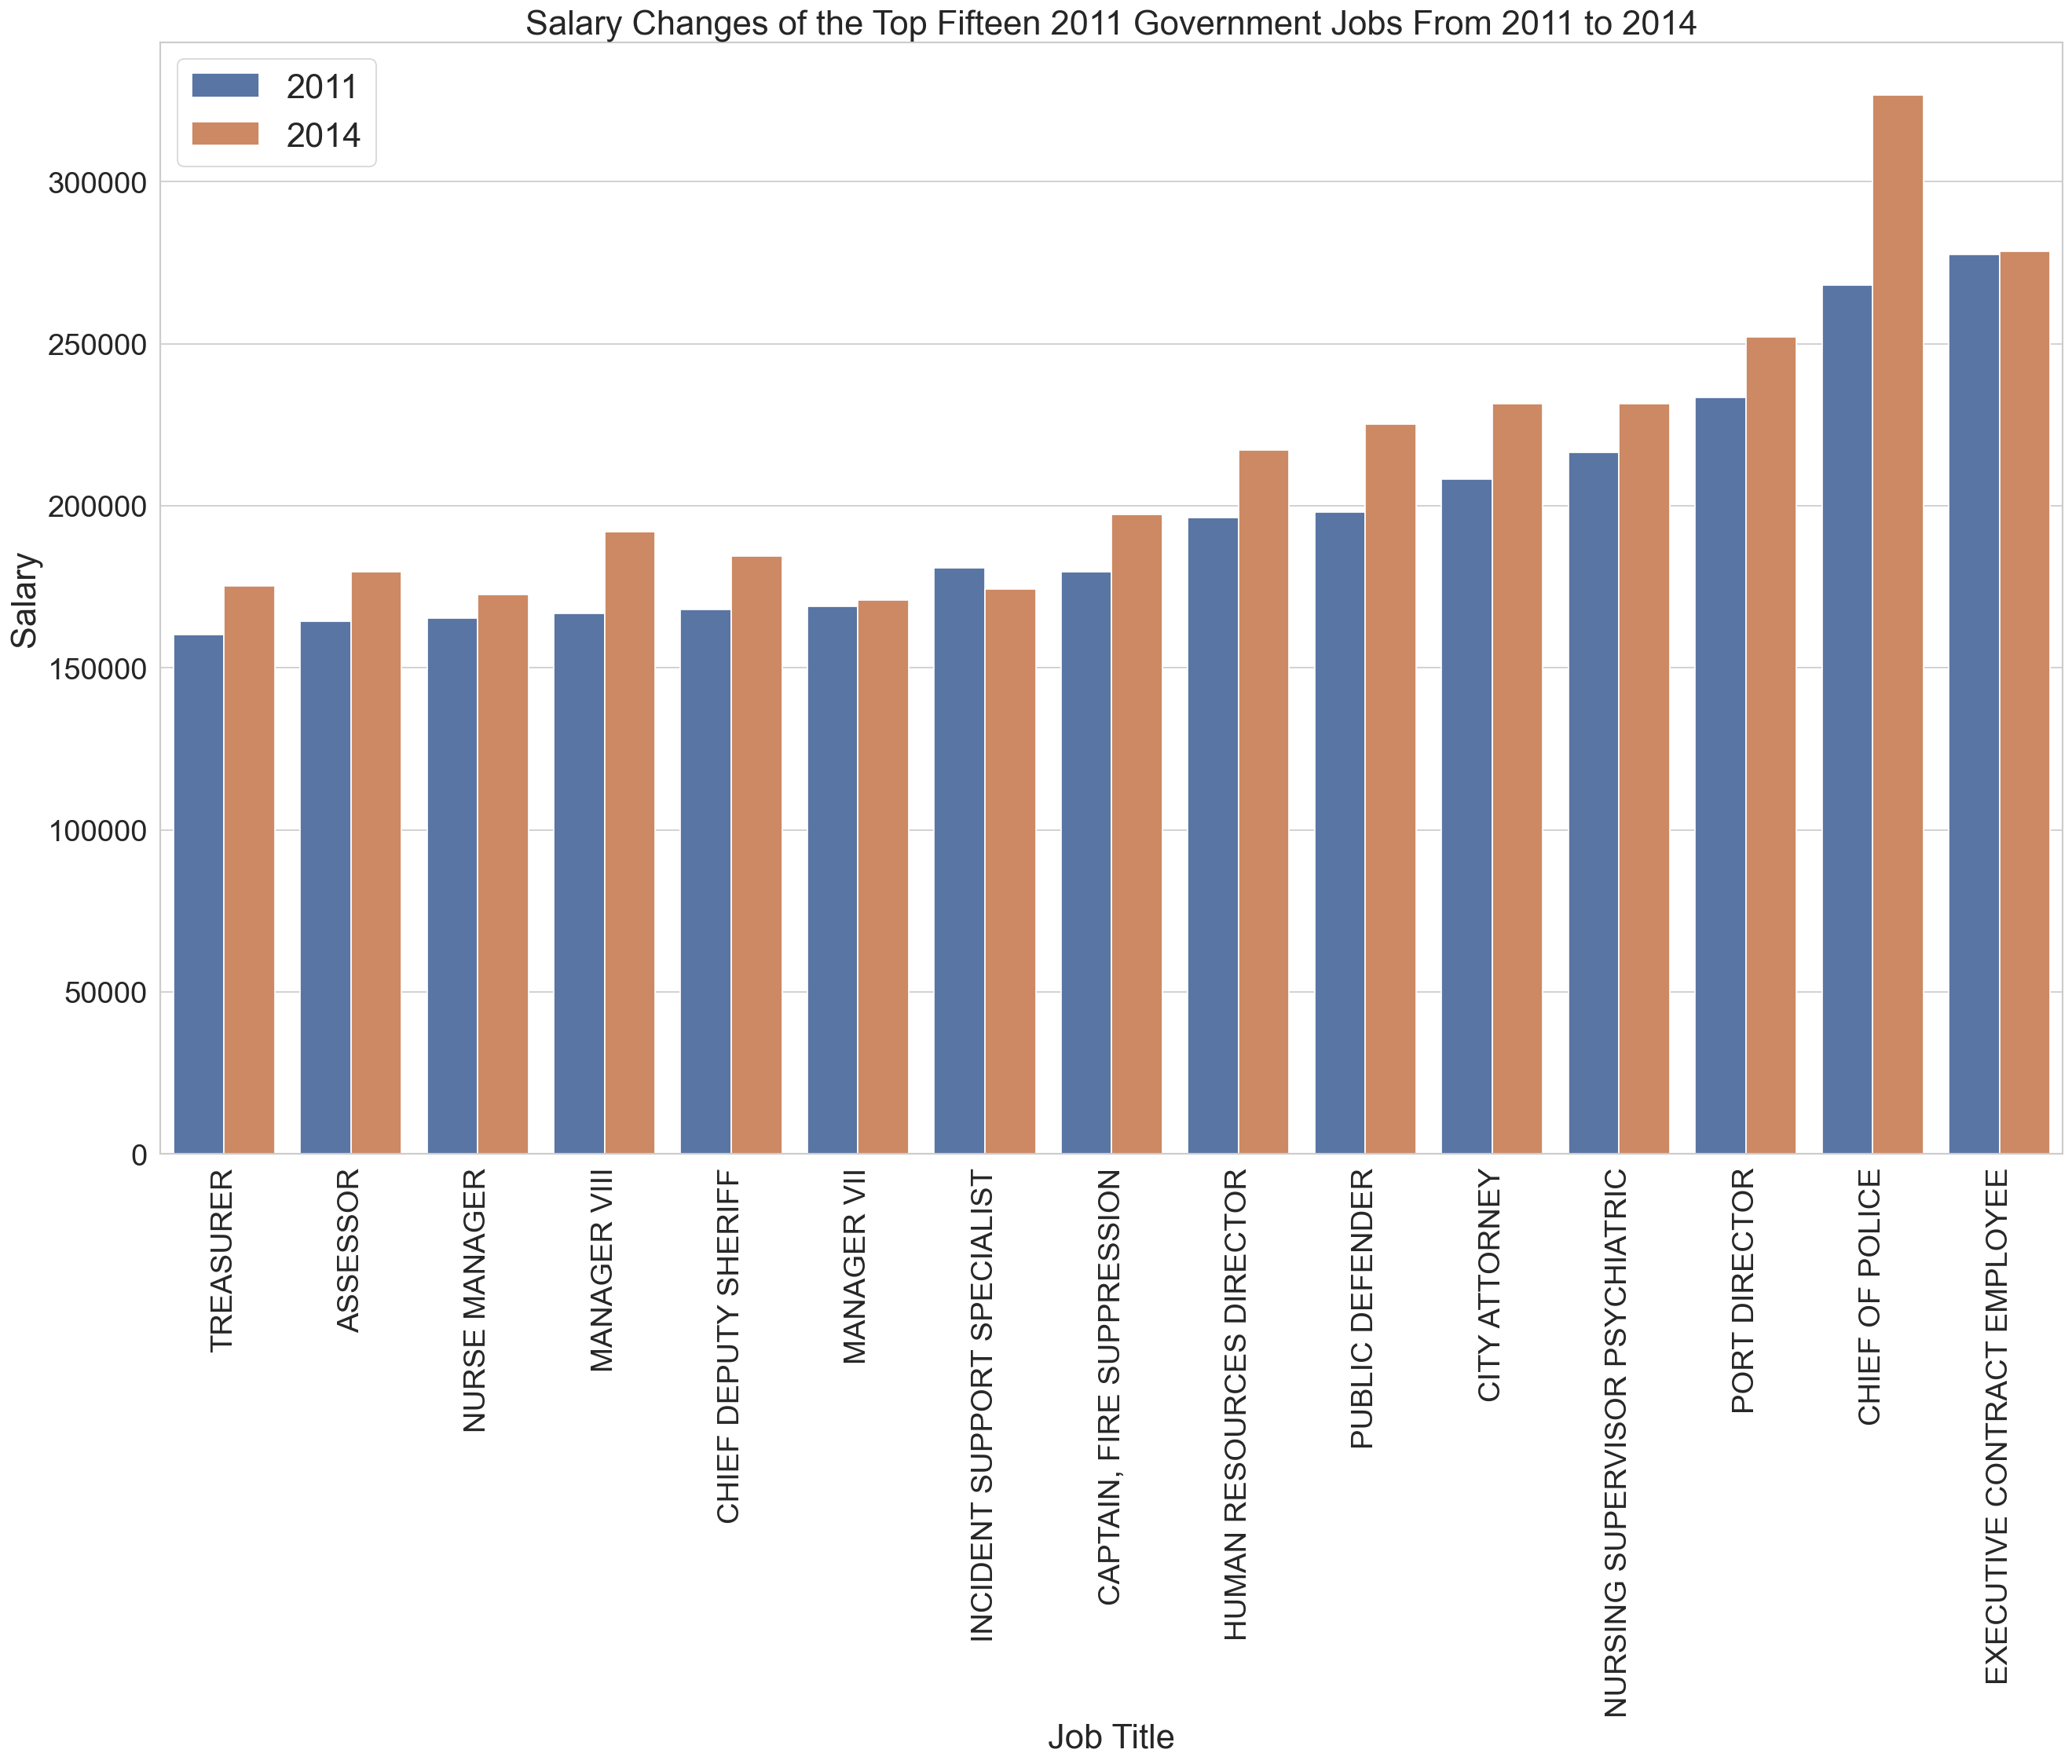

In [13]:
sns.set(font_scale = 2)
sns.set_style('whitegrid')
plt.figure(figsize=[25,15])
plot1 = sns.barplot(x = 'JobTitle', y = 'value', data = test3, hue = 'year')

plt.xticks(rotation = 90)
plot1.set_xlabel("Job Title", fontsize = 25)
plot1.set_ylabel("Salary", fontsize = 25)
plot1.set_title("Salary Changes of the Top Fifteen 2011 Government Jobs From 2011 to 2014", fontsize = 25)
plot1.legend(title = '', loc = 'upper left', fontsize = 25)
plt.show()

Using the Other 3 Aggregated Datasets to Create Graphs

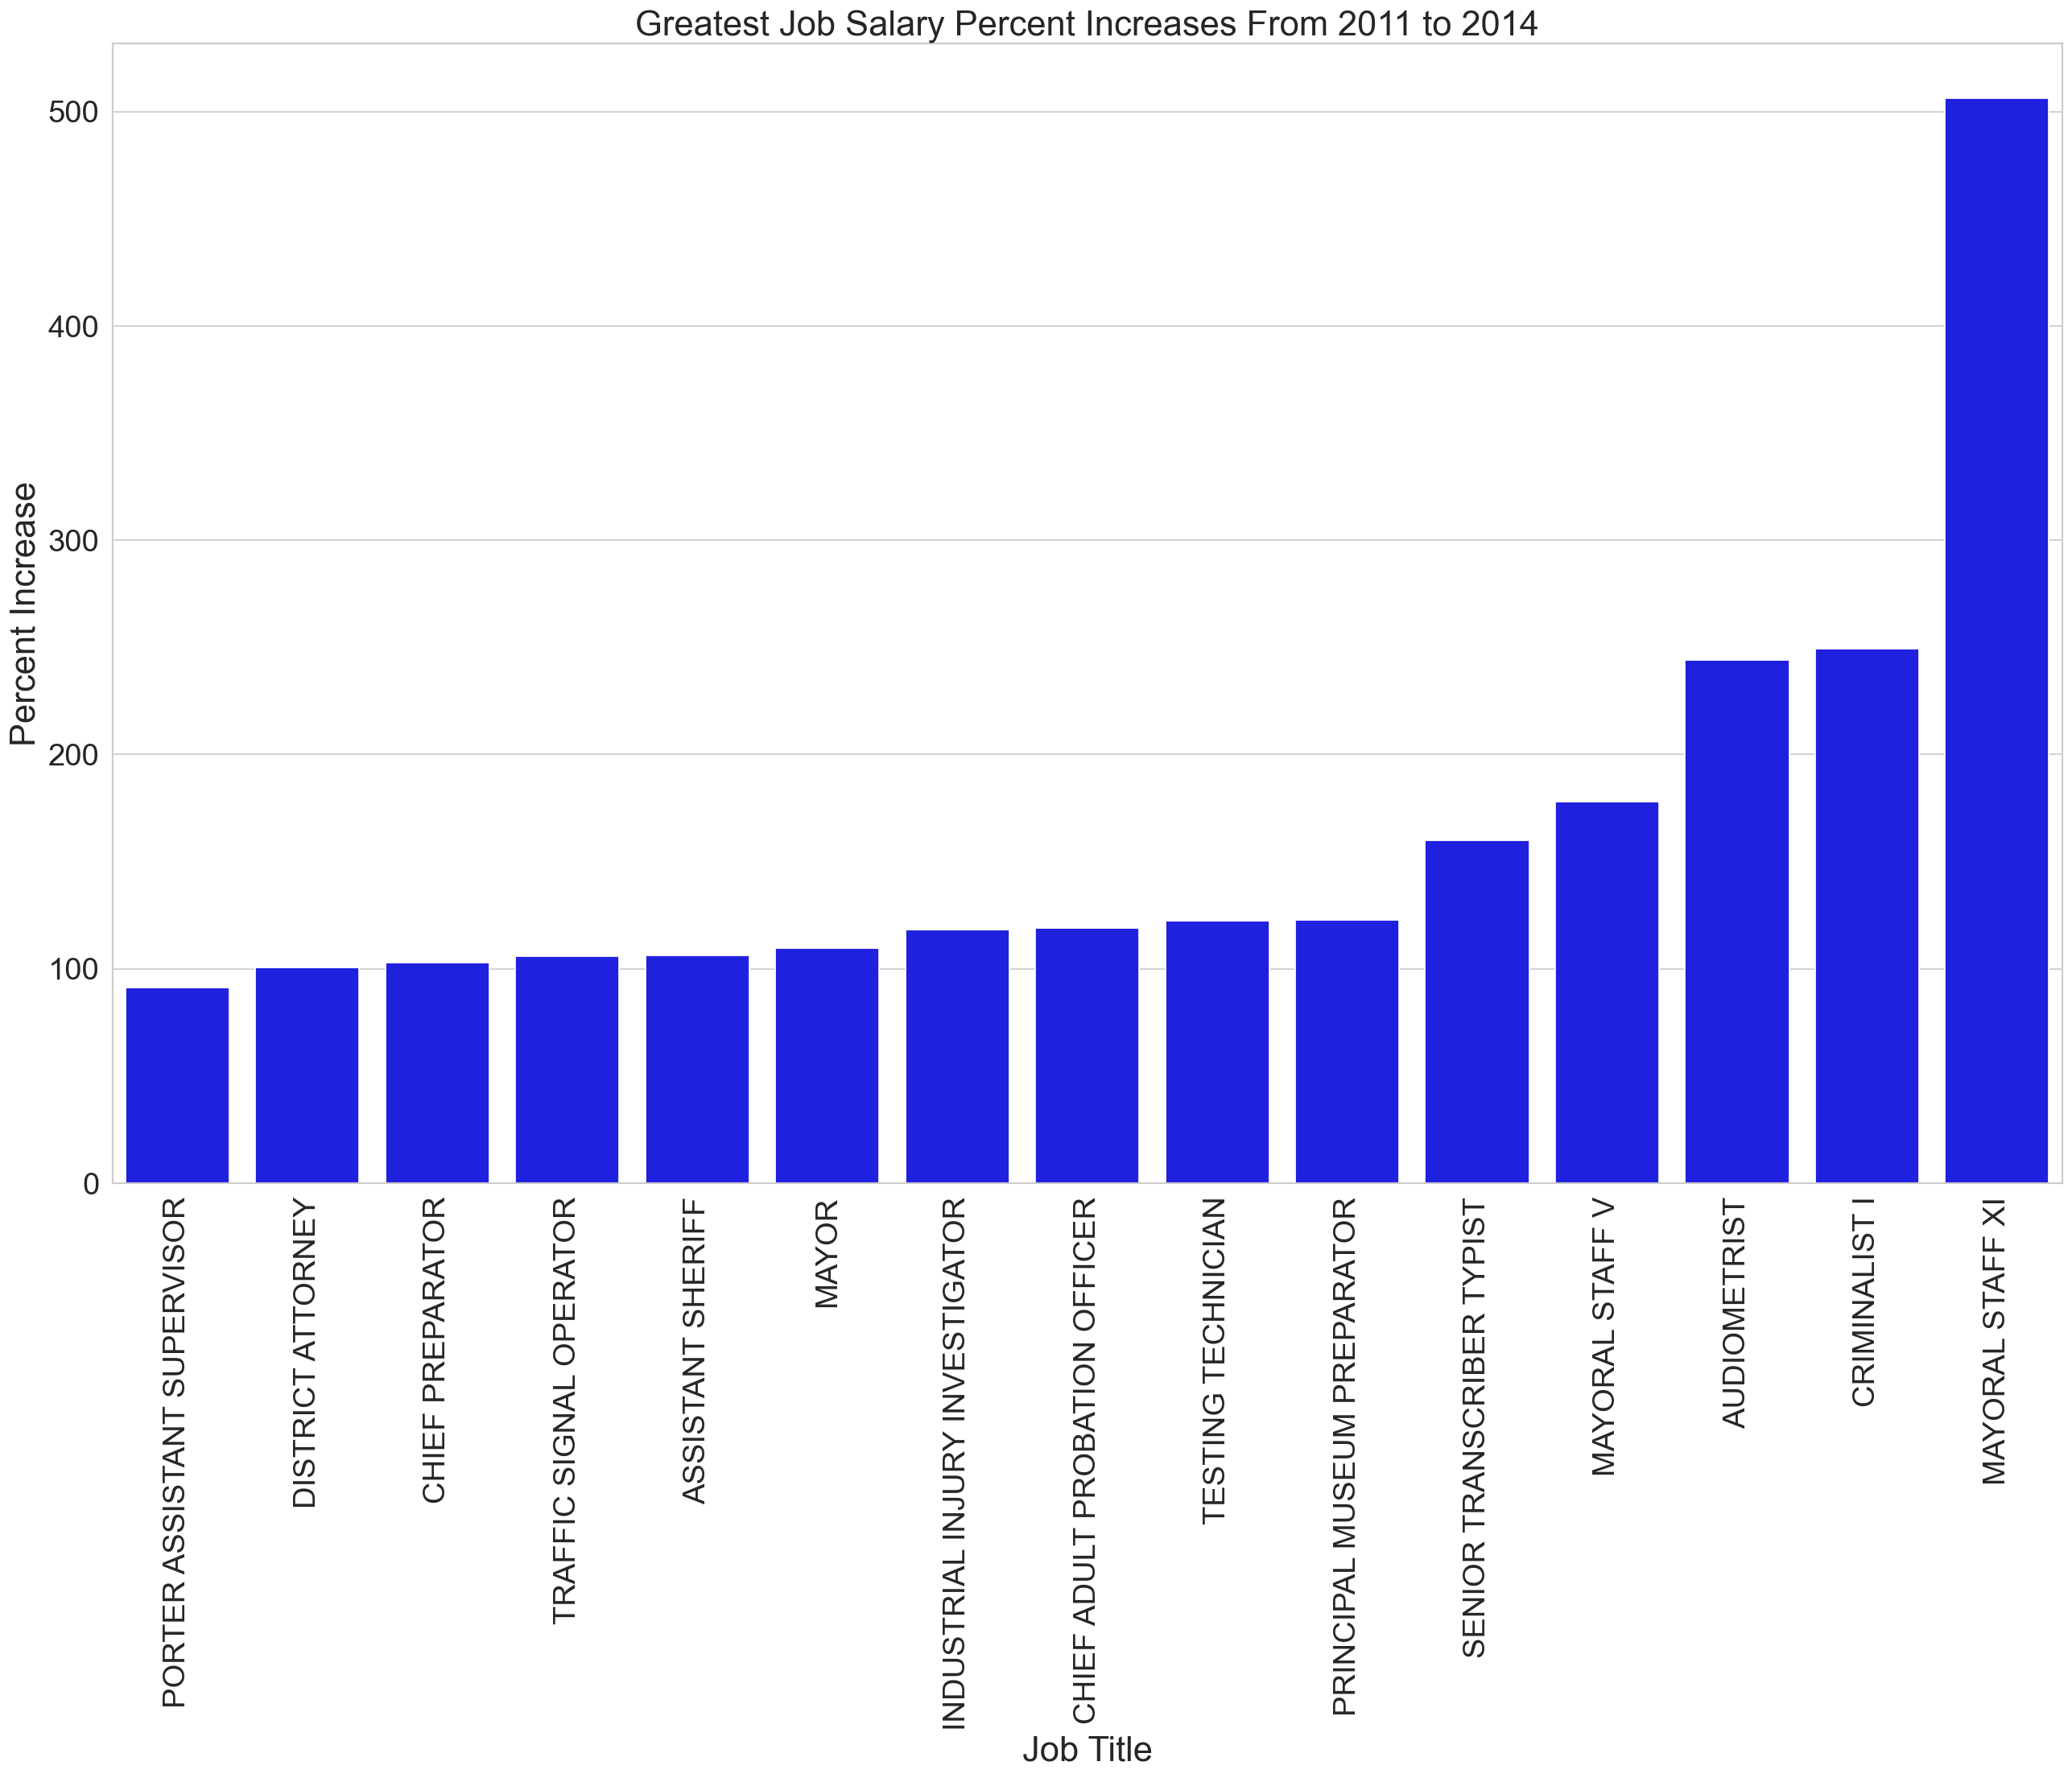

In [14]:
sns.set(font_scale = 2)
sns.set_style('whitegrid')
plt.figure(figsize=[25,15])
plot2 = sns.barplot(x = 'JobTitle', y = 'value', data = merged_agg2, color = 'Blue')
plt.xticks(rotation = 90)
plot2.set_xlabel("Job Title", fontsize = 25)
plot2.set_ylabel("Percent Increase", fontsize = 25)
plot2.set_title("Greatest Job Salary Percent Increases From 2011 to 2014", fontsize = 25)
plt.annotate
plt.show()

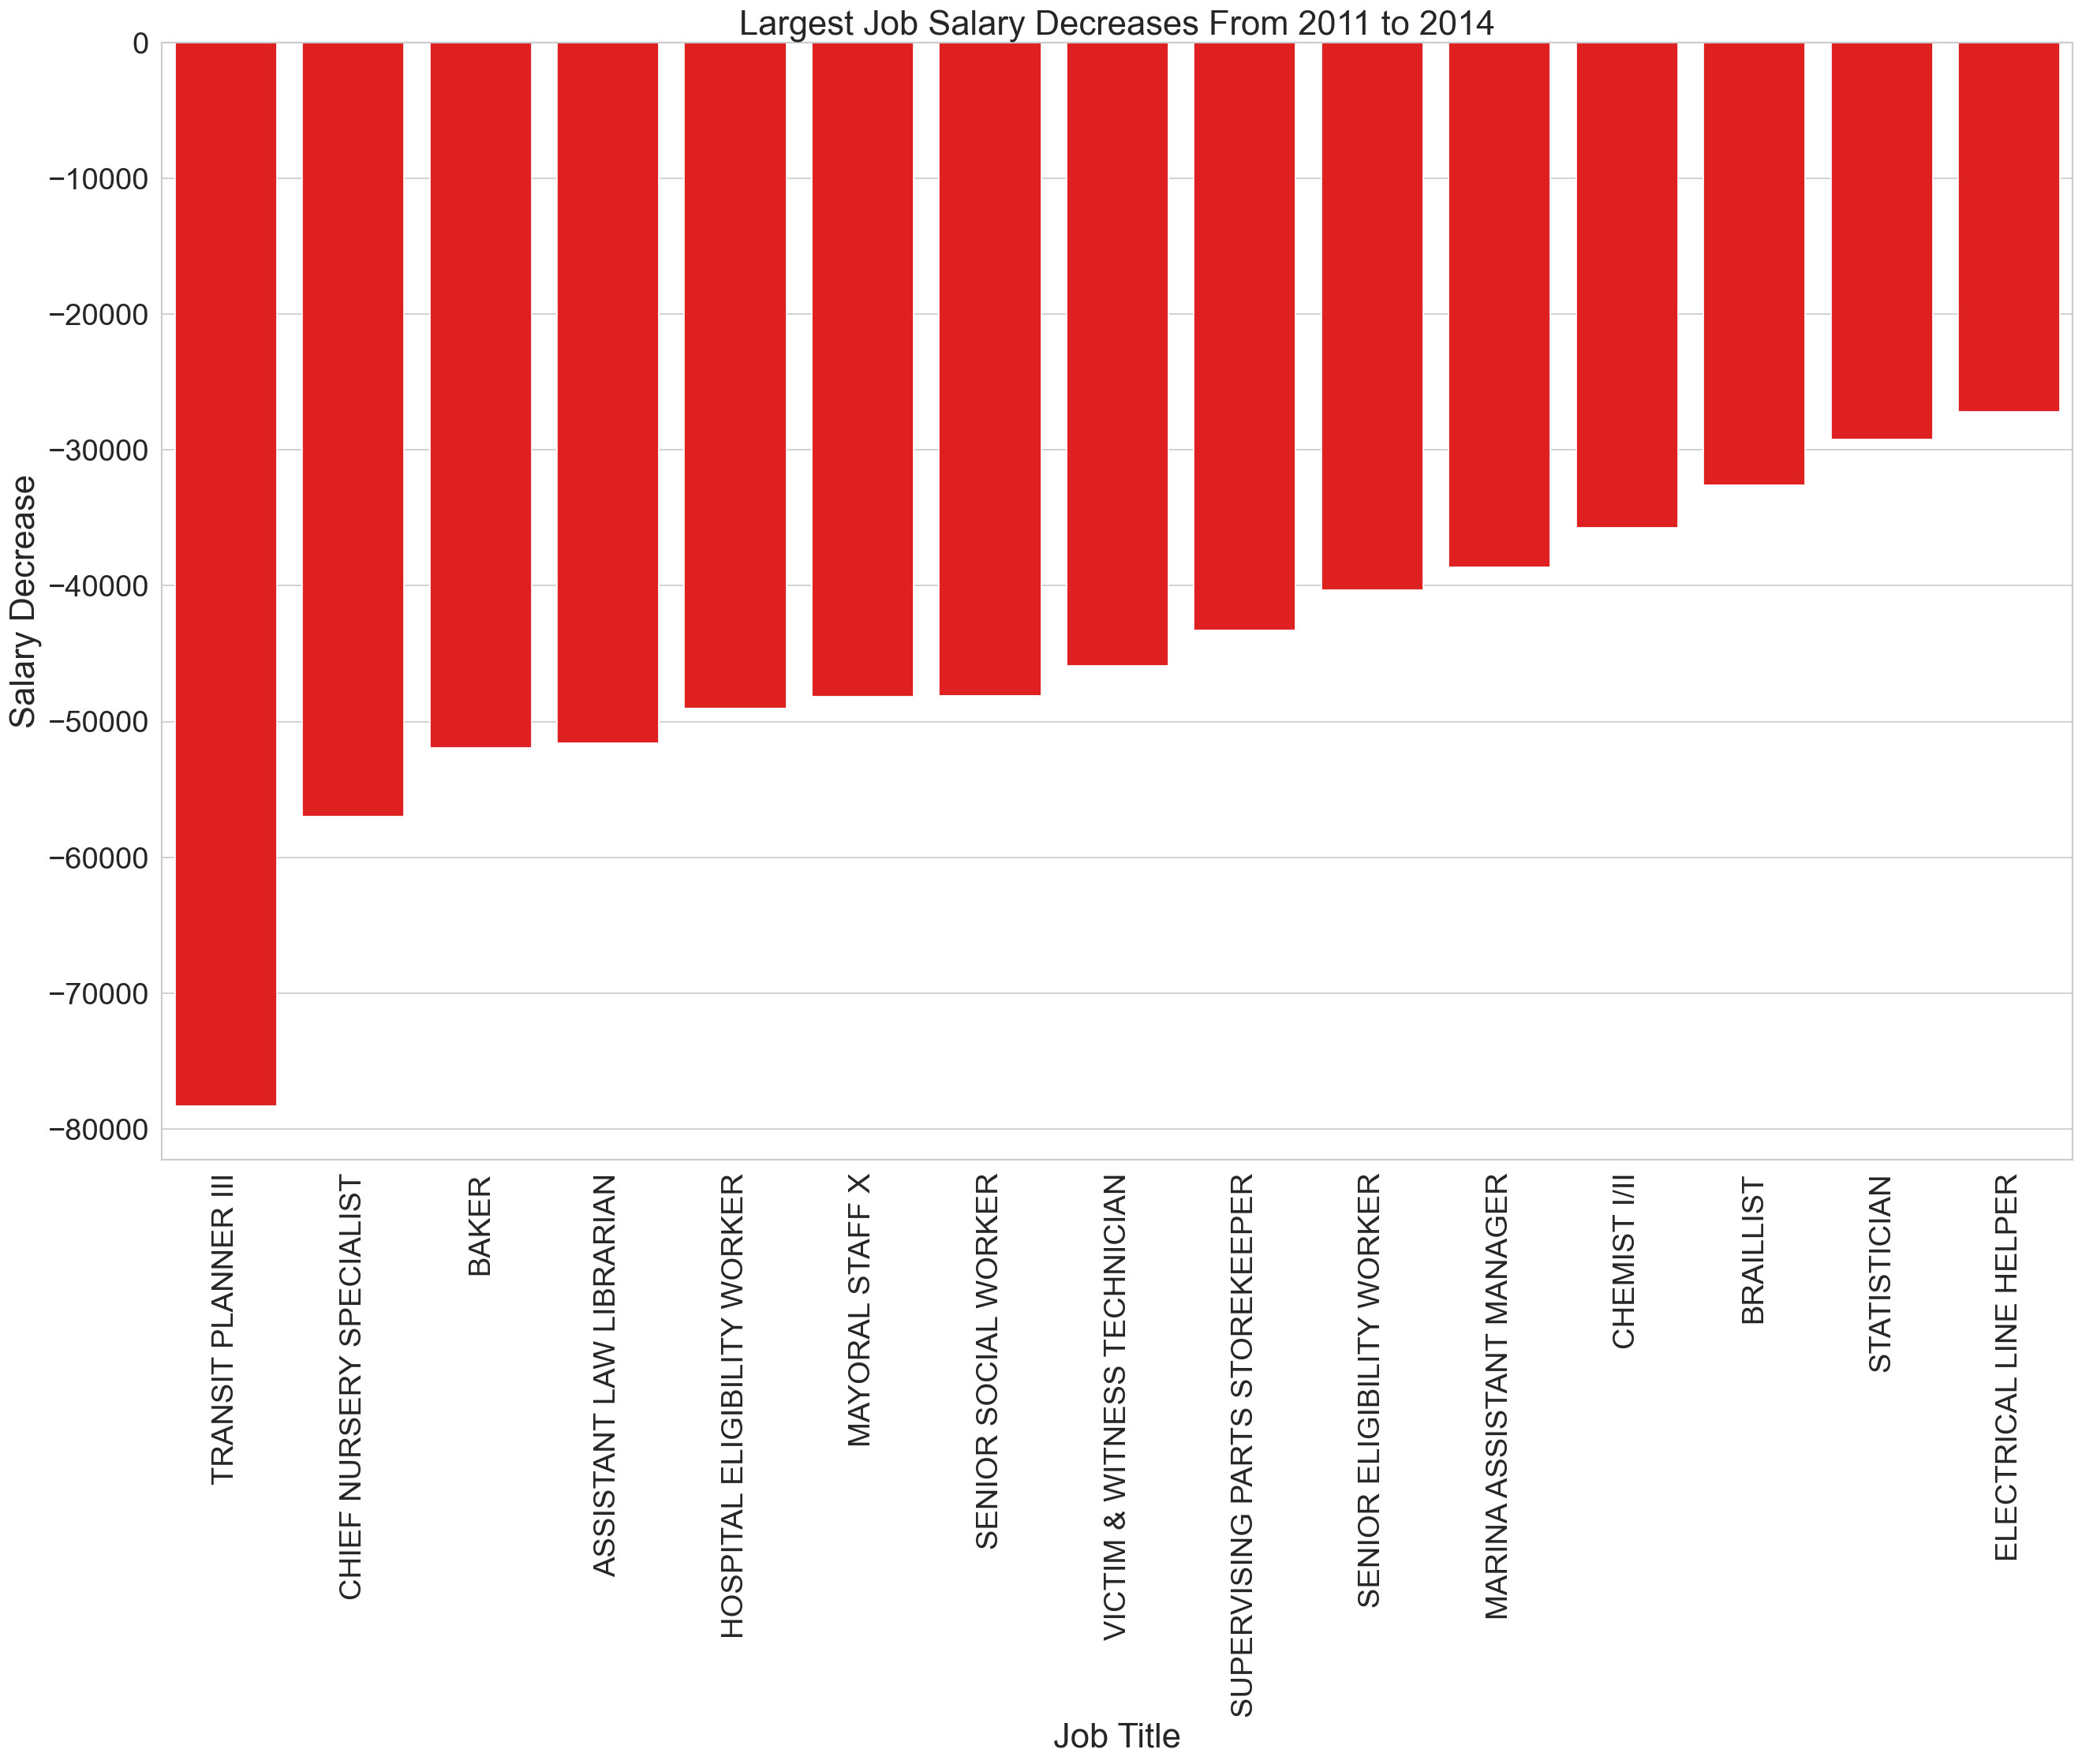

In [15]:
sns.set(font_scale = 2)
sns.set_style('whitegrid')
plt.figure(figsize=[25,15])
plot3 = sns.barplot(x = 'JobTitle', y = 'value', data = merged_agg4, color = 'Red')
plt.xticks(rotation = 90)
plot3.set_xlabel("Job Title", fontsize = 25)
plot3.set_ylabel("Salary Decrease", fontsize = 25)
plot3.set_title("Largest Job Salary Decreases From 2011 to 2014", fontsize = 25)
plt.show()

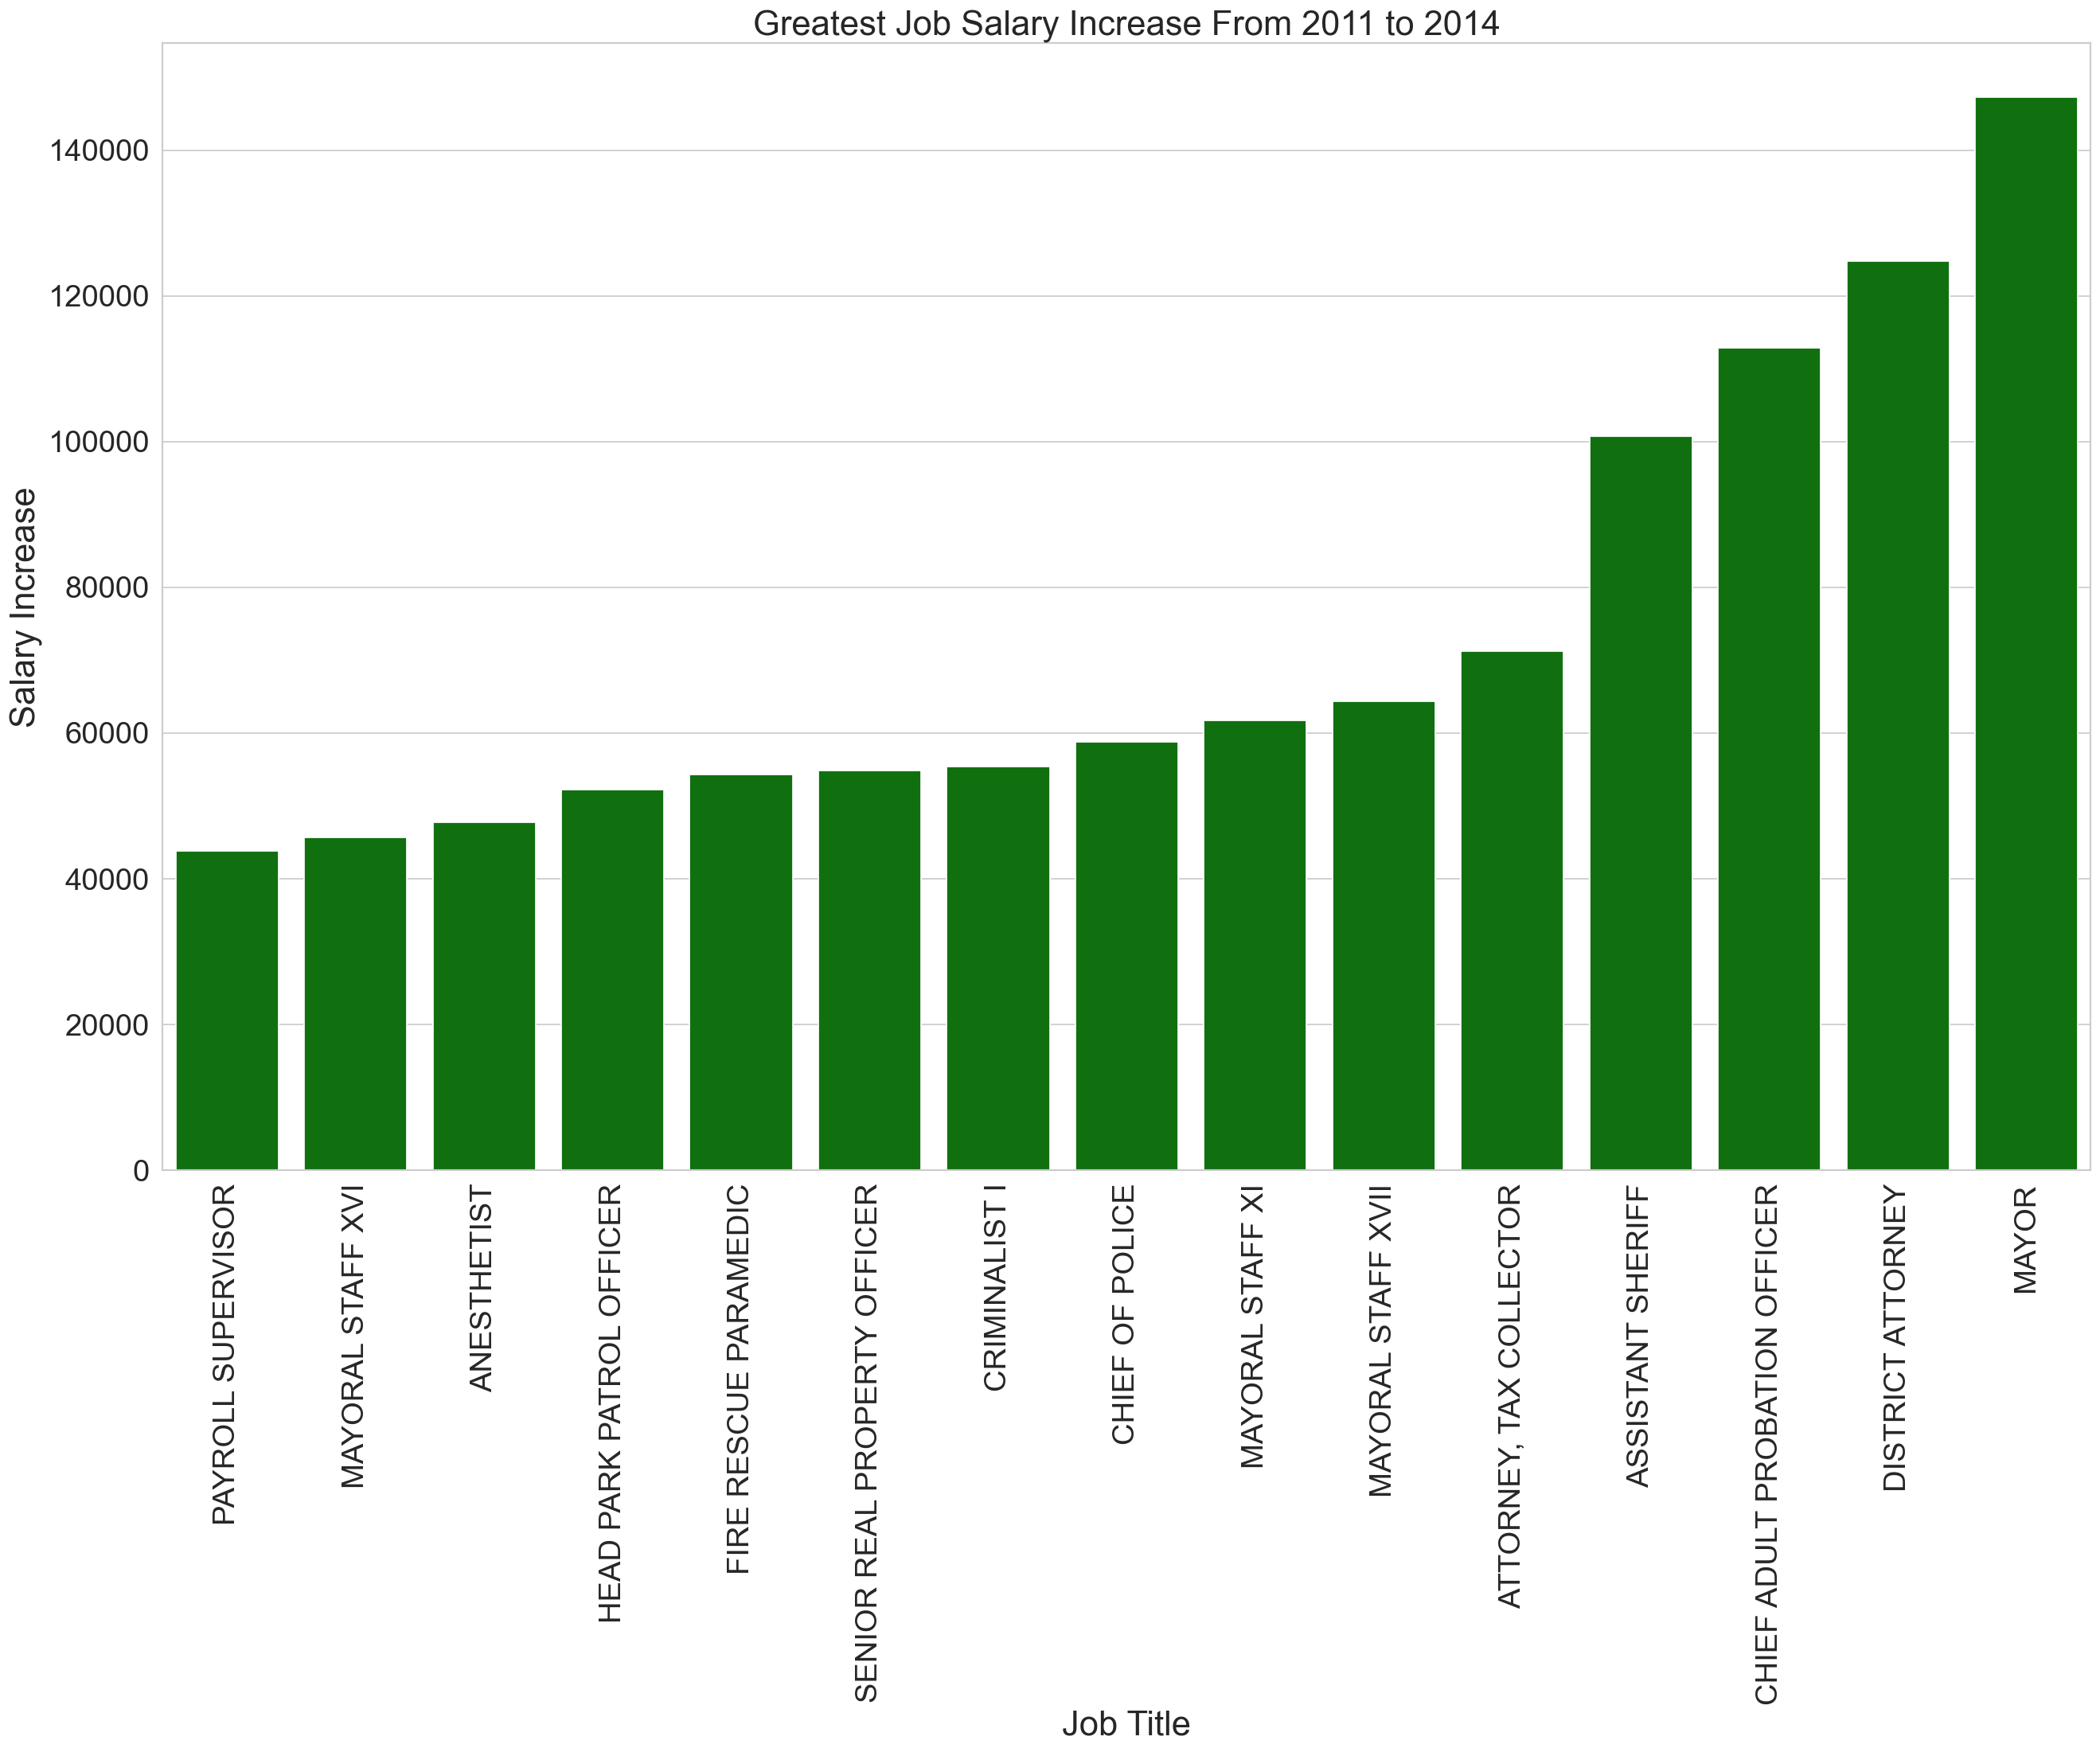

In [16]:
sns.set(font_scale = 2)
sns.set_style('whitegrid')
plt.figure(figsize=[25,15])
plot3 = sns.barplot(x = 'JobTitle', y = 'value', data = merged_agg3, color = 'Green')
plt.xticks(rotation = 90)
plot3.set_xlabel("Job Title", fontsize = 25)
plot3.set_ylabel("Salary Increase", fontsize = 25)
plot3.set_title("Greatest Job Salary Increase From 2011 to 2014", fontsize = 25)
plt.show()

Police Department vs Fire Departmet (Difference)

In [49]:
merged_agg6 = pd.melt(merged, id_vars=['JobTitle'], value_vars=['difference'])
merged_agg6 = merged_agg6.sort_values('value', ascending = False).drop(columns = ['variable'])
merged_agg6 = merged_agg6.loc[merged_agg6['JobTitle'].str.contains('POLICE|SHERIFF')]
merged_agg6
merged_agg6['value'].mean()

23835.50584429781

In [50]:
merged_agg7 = pd.melt(merged, id_vars=['JobTitle'], value_vars=['difference'])
merged_agg7 = merged_agg7.sort_values('value', ascending = False).drop(columns = ['variable'])
merged_agg7 = merged_agg7.loc[merged_agg7['JobTitle'].str.contains('FIRE')]
merged_agg7
merged_agg7['value'].mean()

13194.942726727506

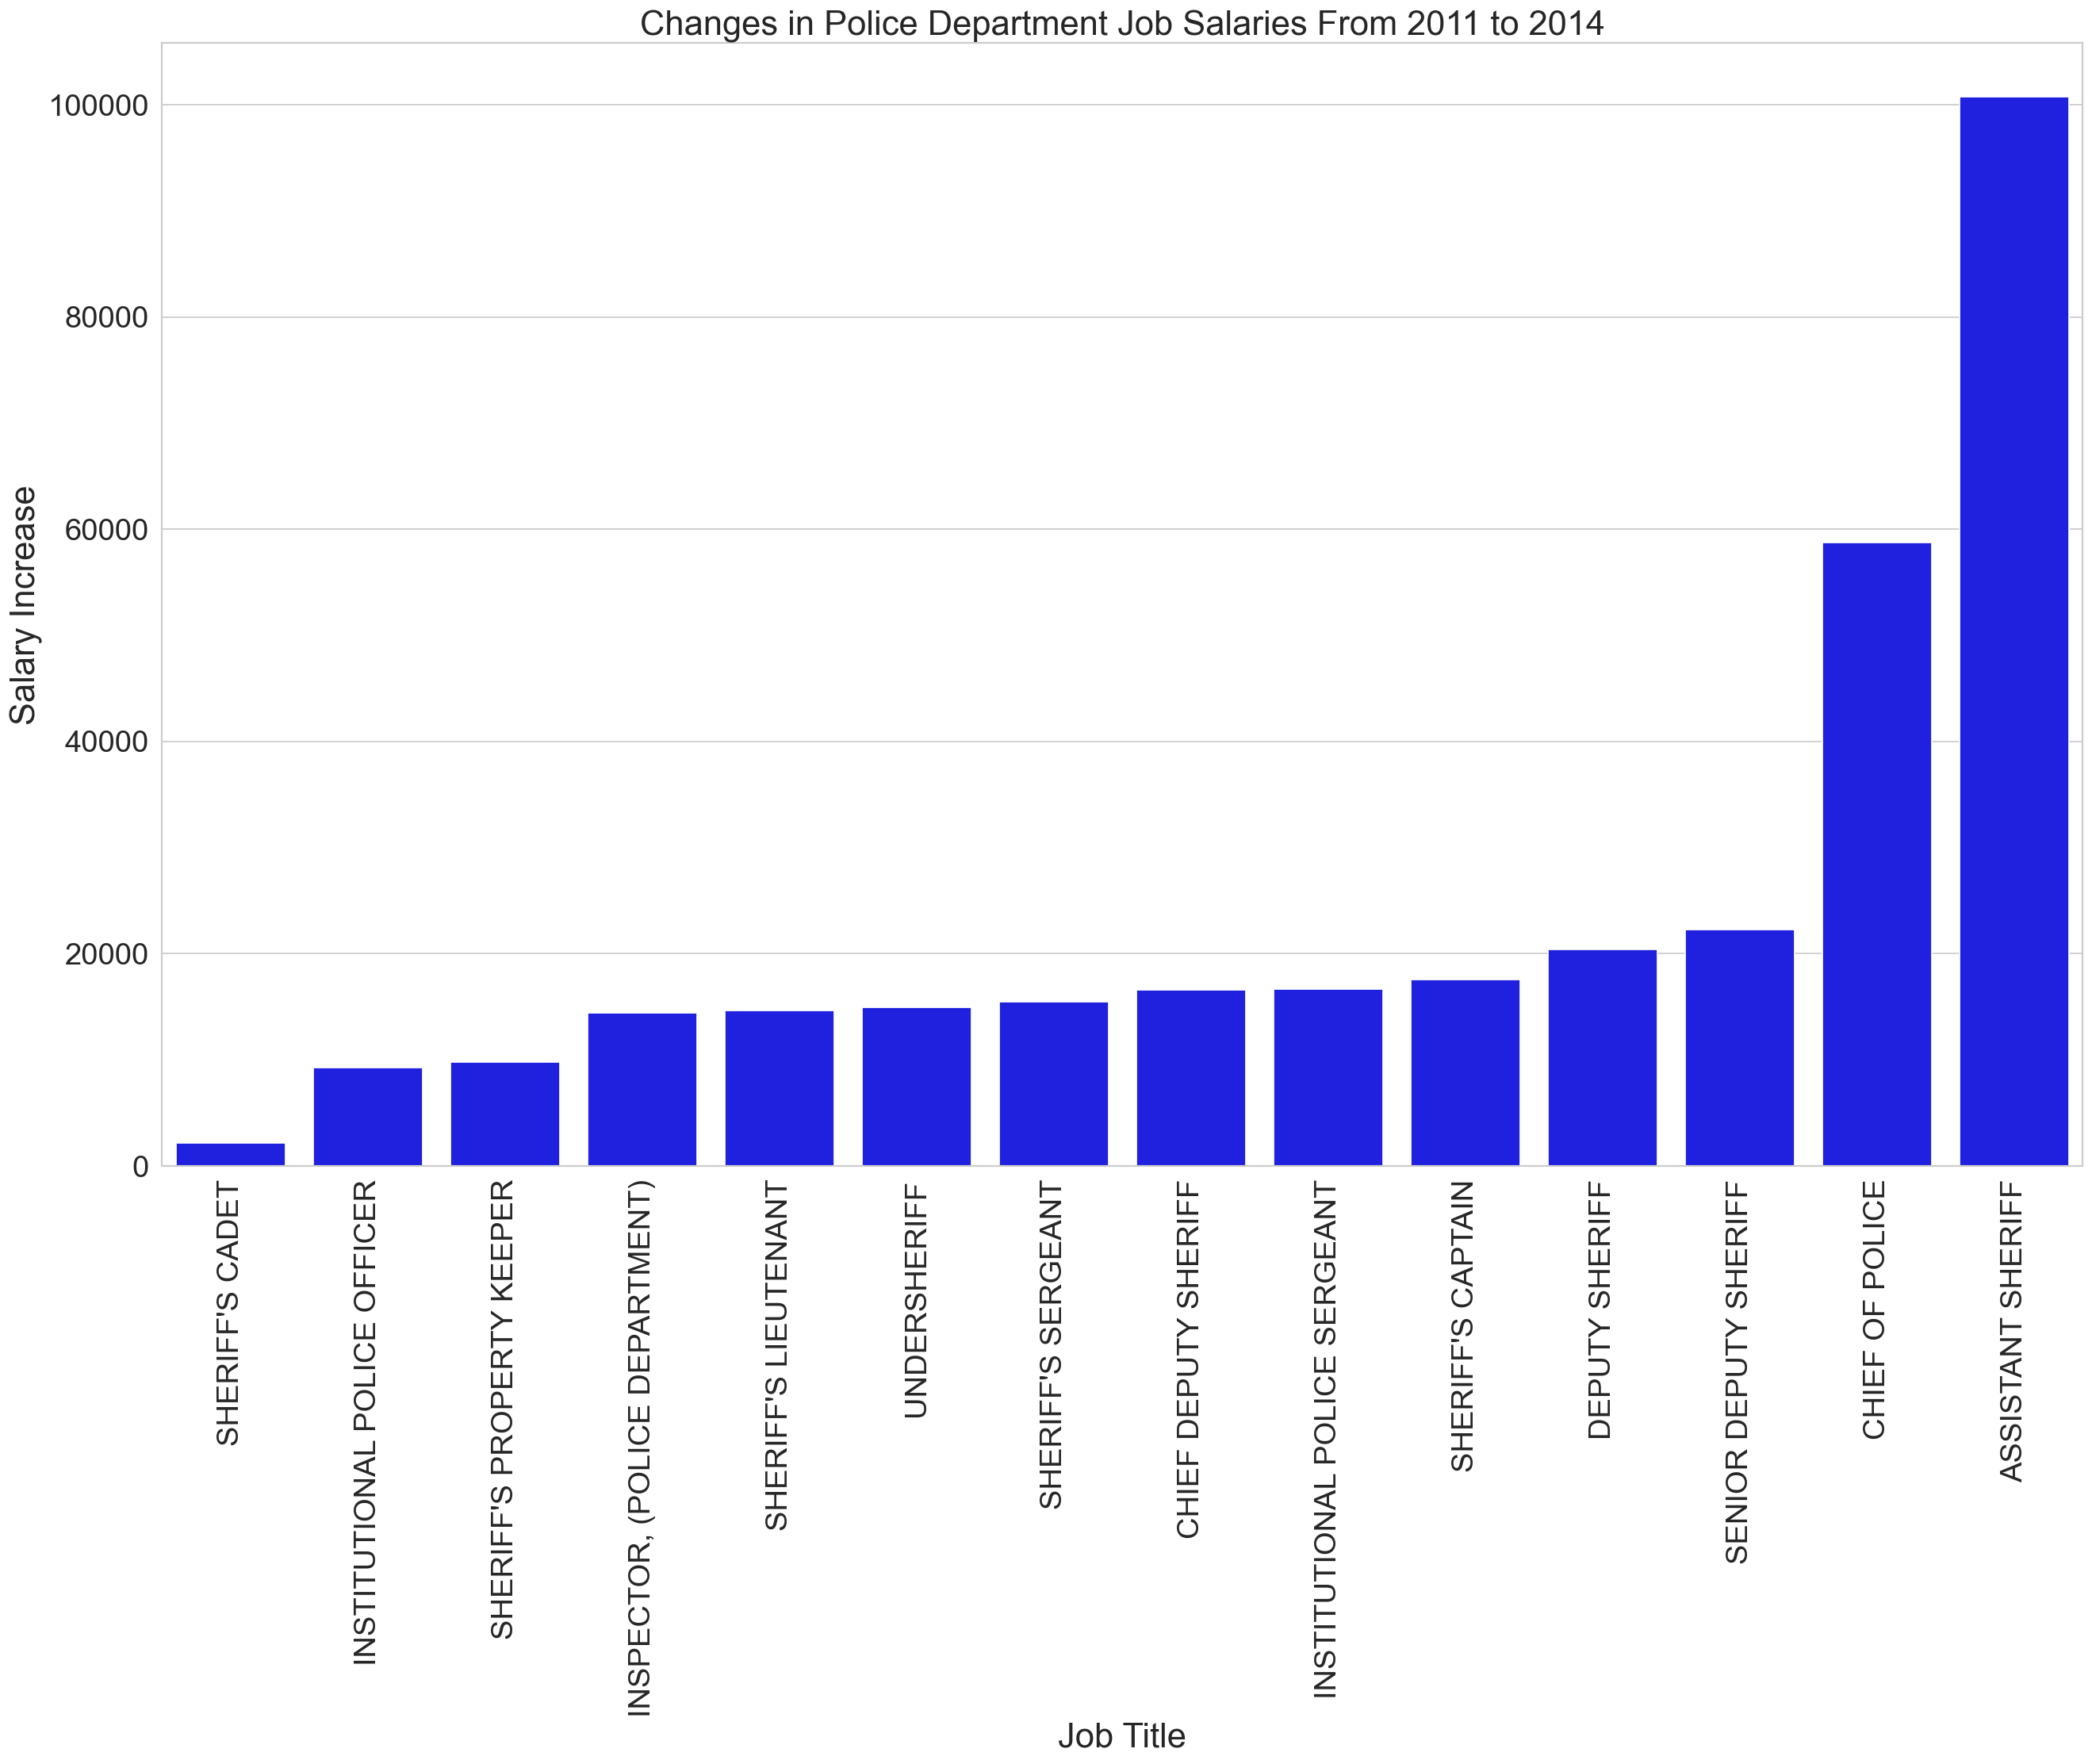

In [51]:
merged_agg6 = merged_agg6.sort_values('value')
sns.set(font_scale = 2)
sns.set_style('whitegrid')
plt.figure(figsize=[25,15])
plot3 = sns.barplot(x = 'JobTitle', y = 'value', data = merged_agg6, color = 'Blue')
plt.xticks(rotation = 90)
plot3.set_xlabel("Job Title", fontsize = 25)
plot3.set_ylabel("Salary Increase", fontsize = 25)
plot3.set_title("Changes in Police Department Job Salaries From 2011 to 2014", fontsize = 25)
plt.show()

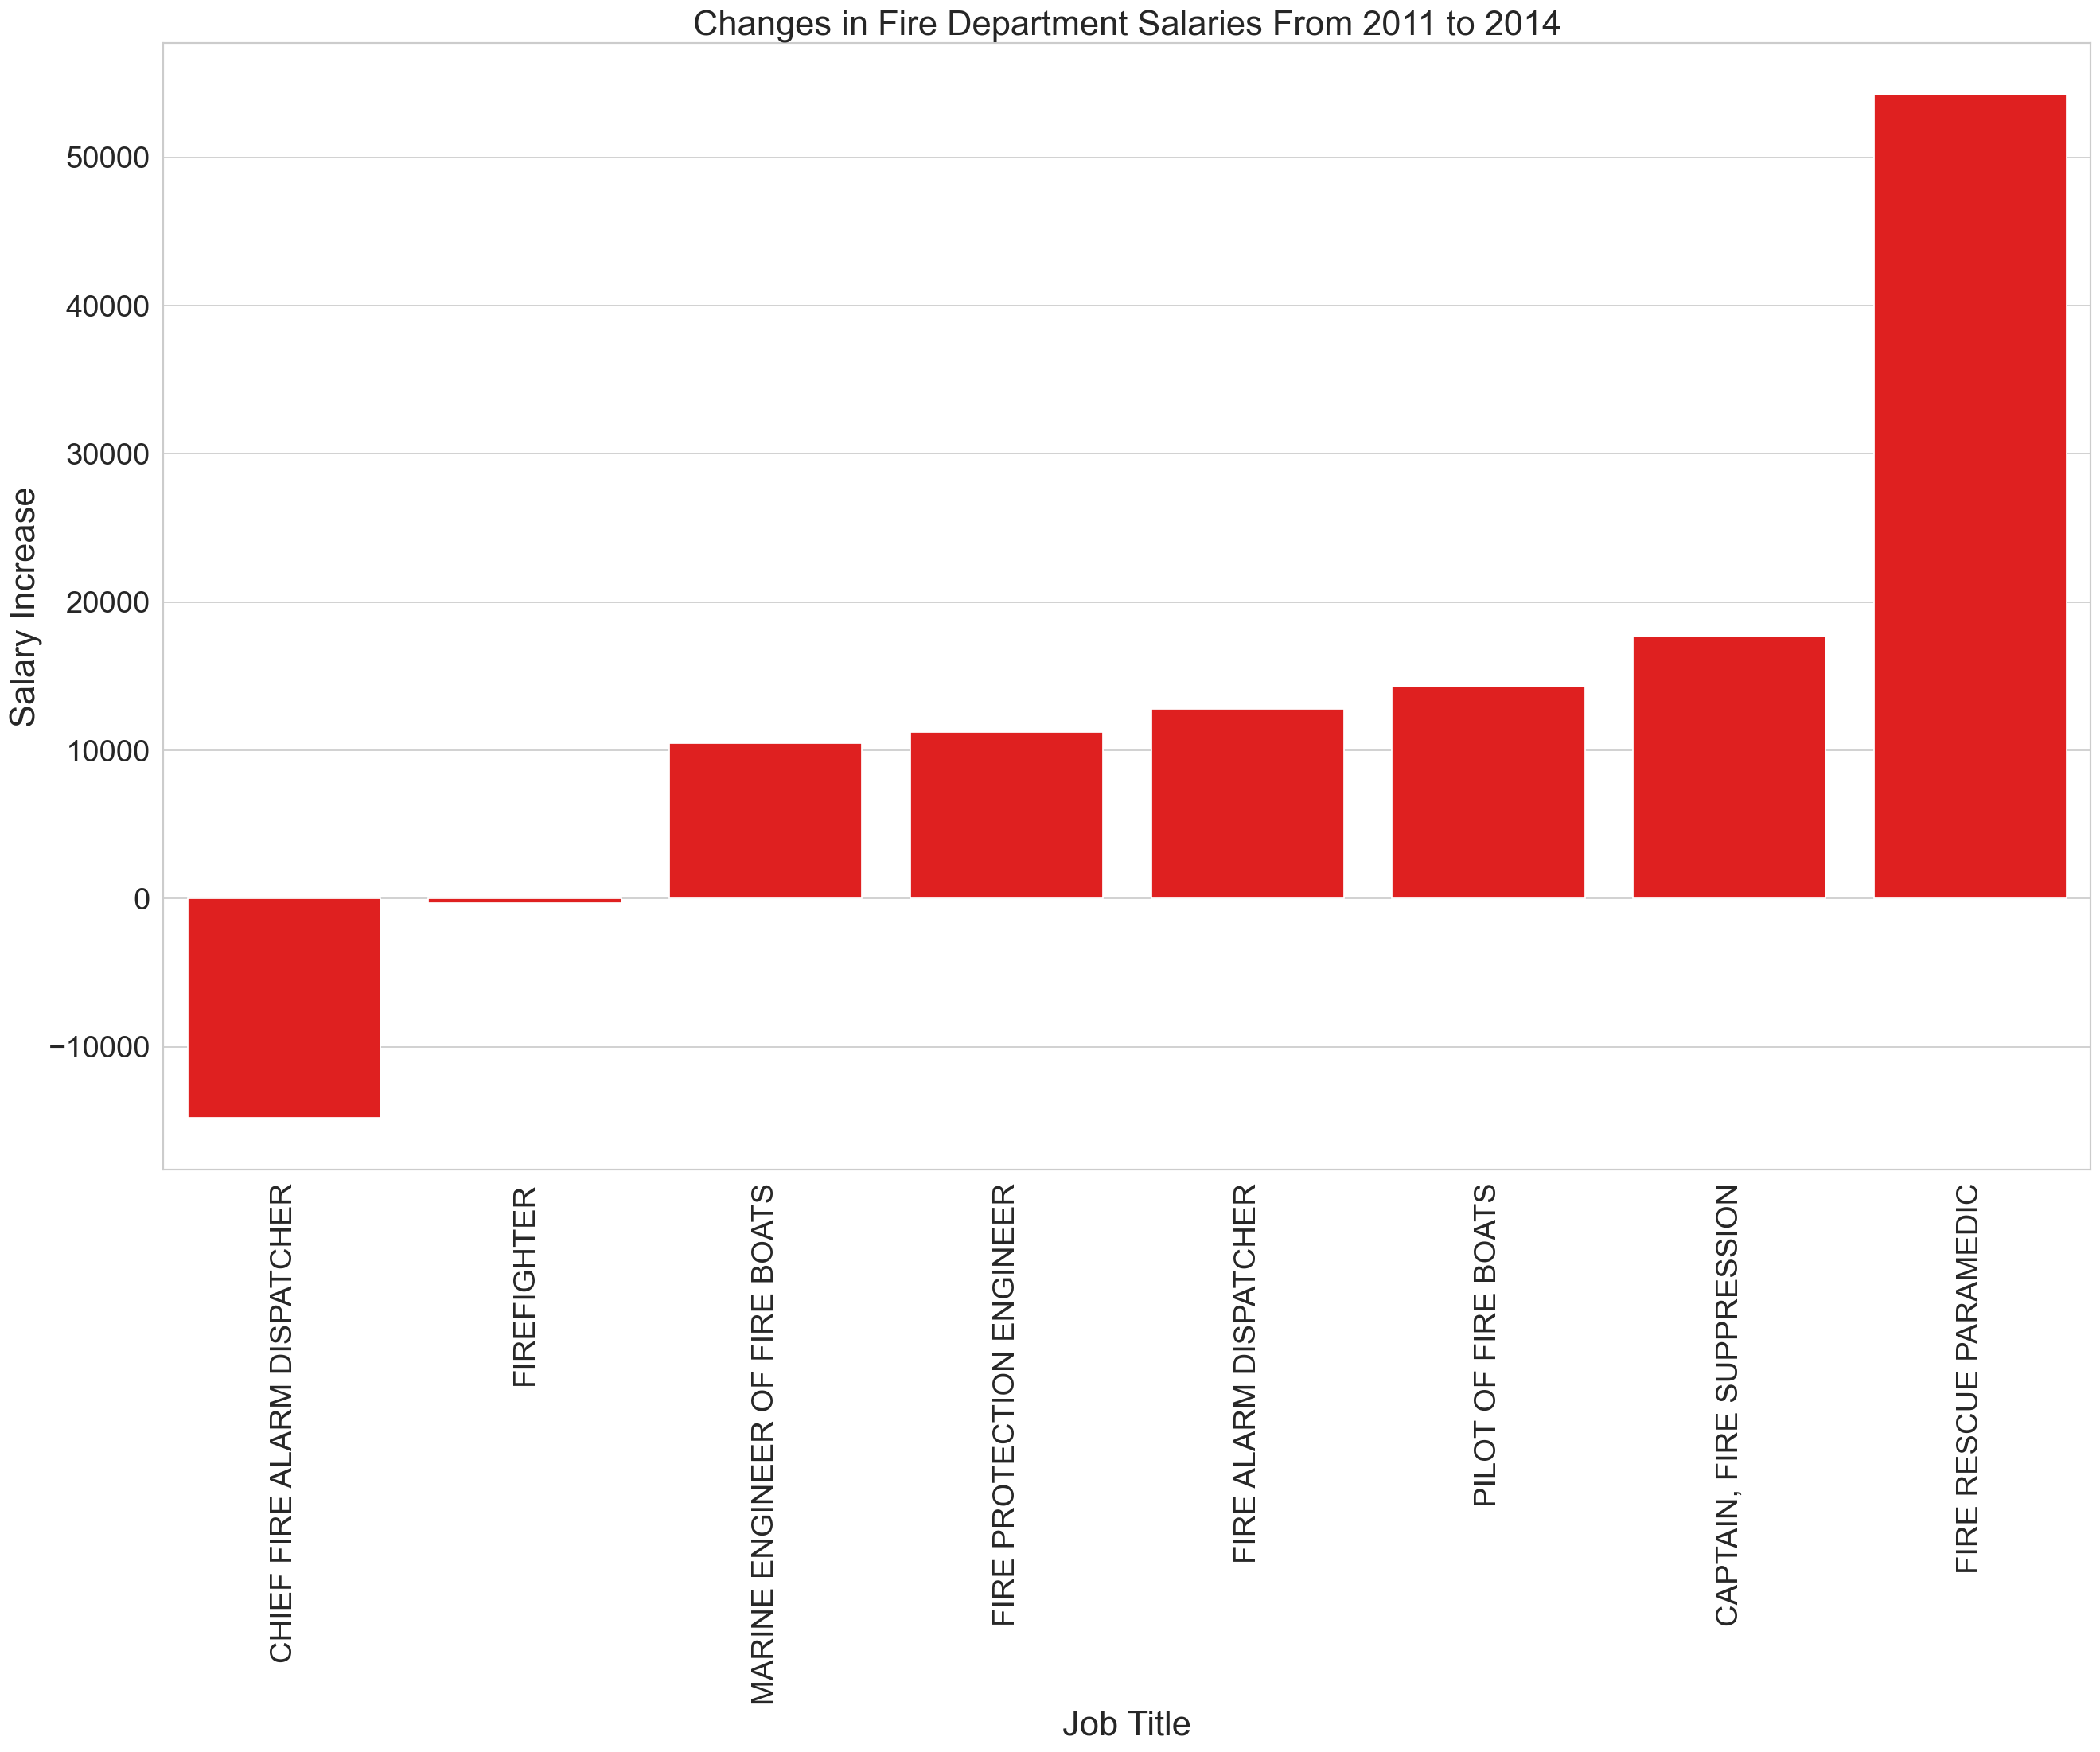

In [52]:
merged_agg7 = merged_agg7.sort_values('value')
sns.set(font_scale = 2)
sns.set_style('whitegrid')
plt.figure(figsize=[25,15])
plot3 = sns.barplot(x = 'JobTitle', y = 'value', data = merged_agg7, color = 'Red')
plt.xticks(rotation = 90)
plot3.set_xlabel("Job Title", fontsize = 25)
plot3.set_ylabel("Salary Increase", fontsize = 25)
plot3.set_title("Changes in Fire Department Salaries From 2011 to 2014", fontsize = 25)
plt.show()

Police Department vs. Fire Department (Percent Increase)

In [48]:
merged_agg11 = pd.melt(merged, id_vars=['JobTitle'], value_vars=['percent_inc'])
merged_agg11 = merged_agg11.sort_values('value', ascending = False).drop(columns = ['variable'])
merged_agg11 = merged_agg11.loc[merged_agg11['JobTitle'].str.contains('FIRE')]
merged_agg11
merged_agg11['value'].mean()

18.869320145496644

In [31]:
merged_agg12 = pd.melt(merged, id_vars=['JobTitle'], value_vars=['percent_inc'])
merged_agg12 = merged_agg12.sort_values('value', ascending = False).drop(columns = ['variable'])
merged_agg12 = merged_agg12.loc[merged_agg12['JobTitle'].str.contains('POLICE|SHERIFF')]
merged_agg12
merged_agg12['value'].mean()

25.88818913691602

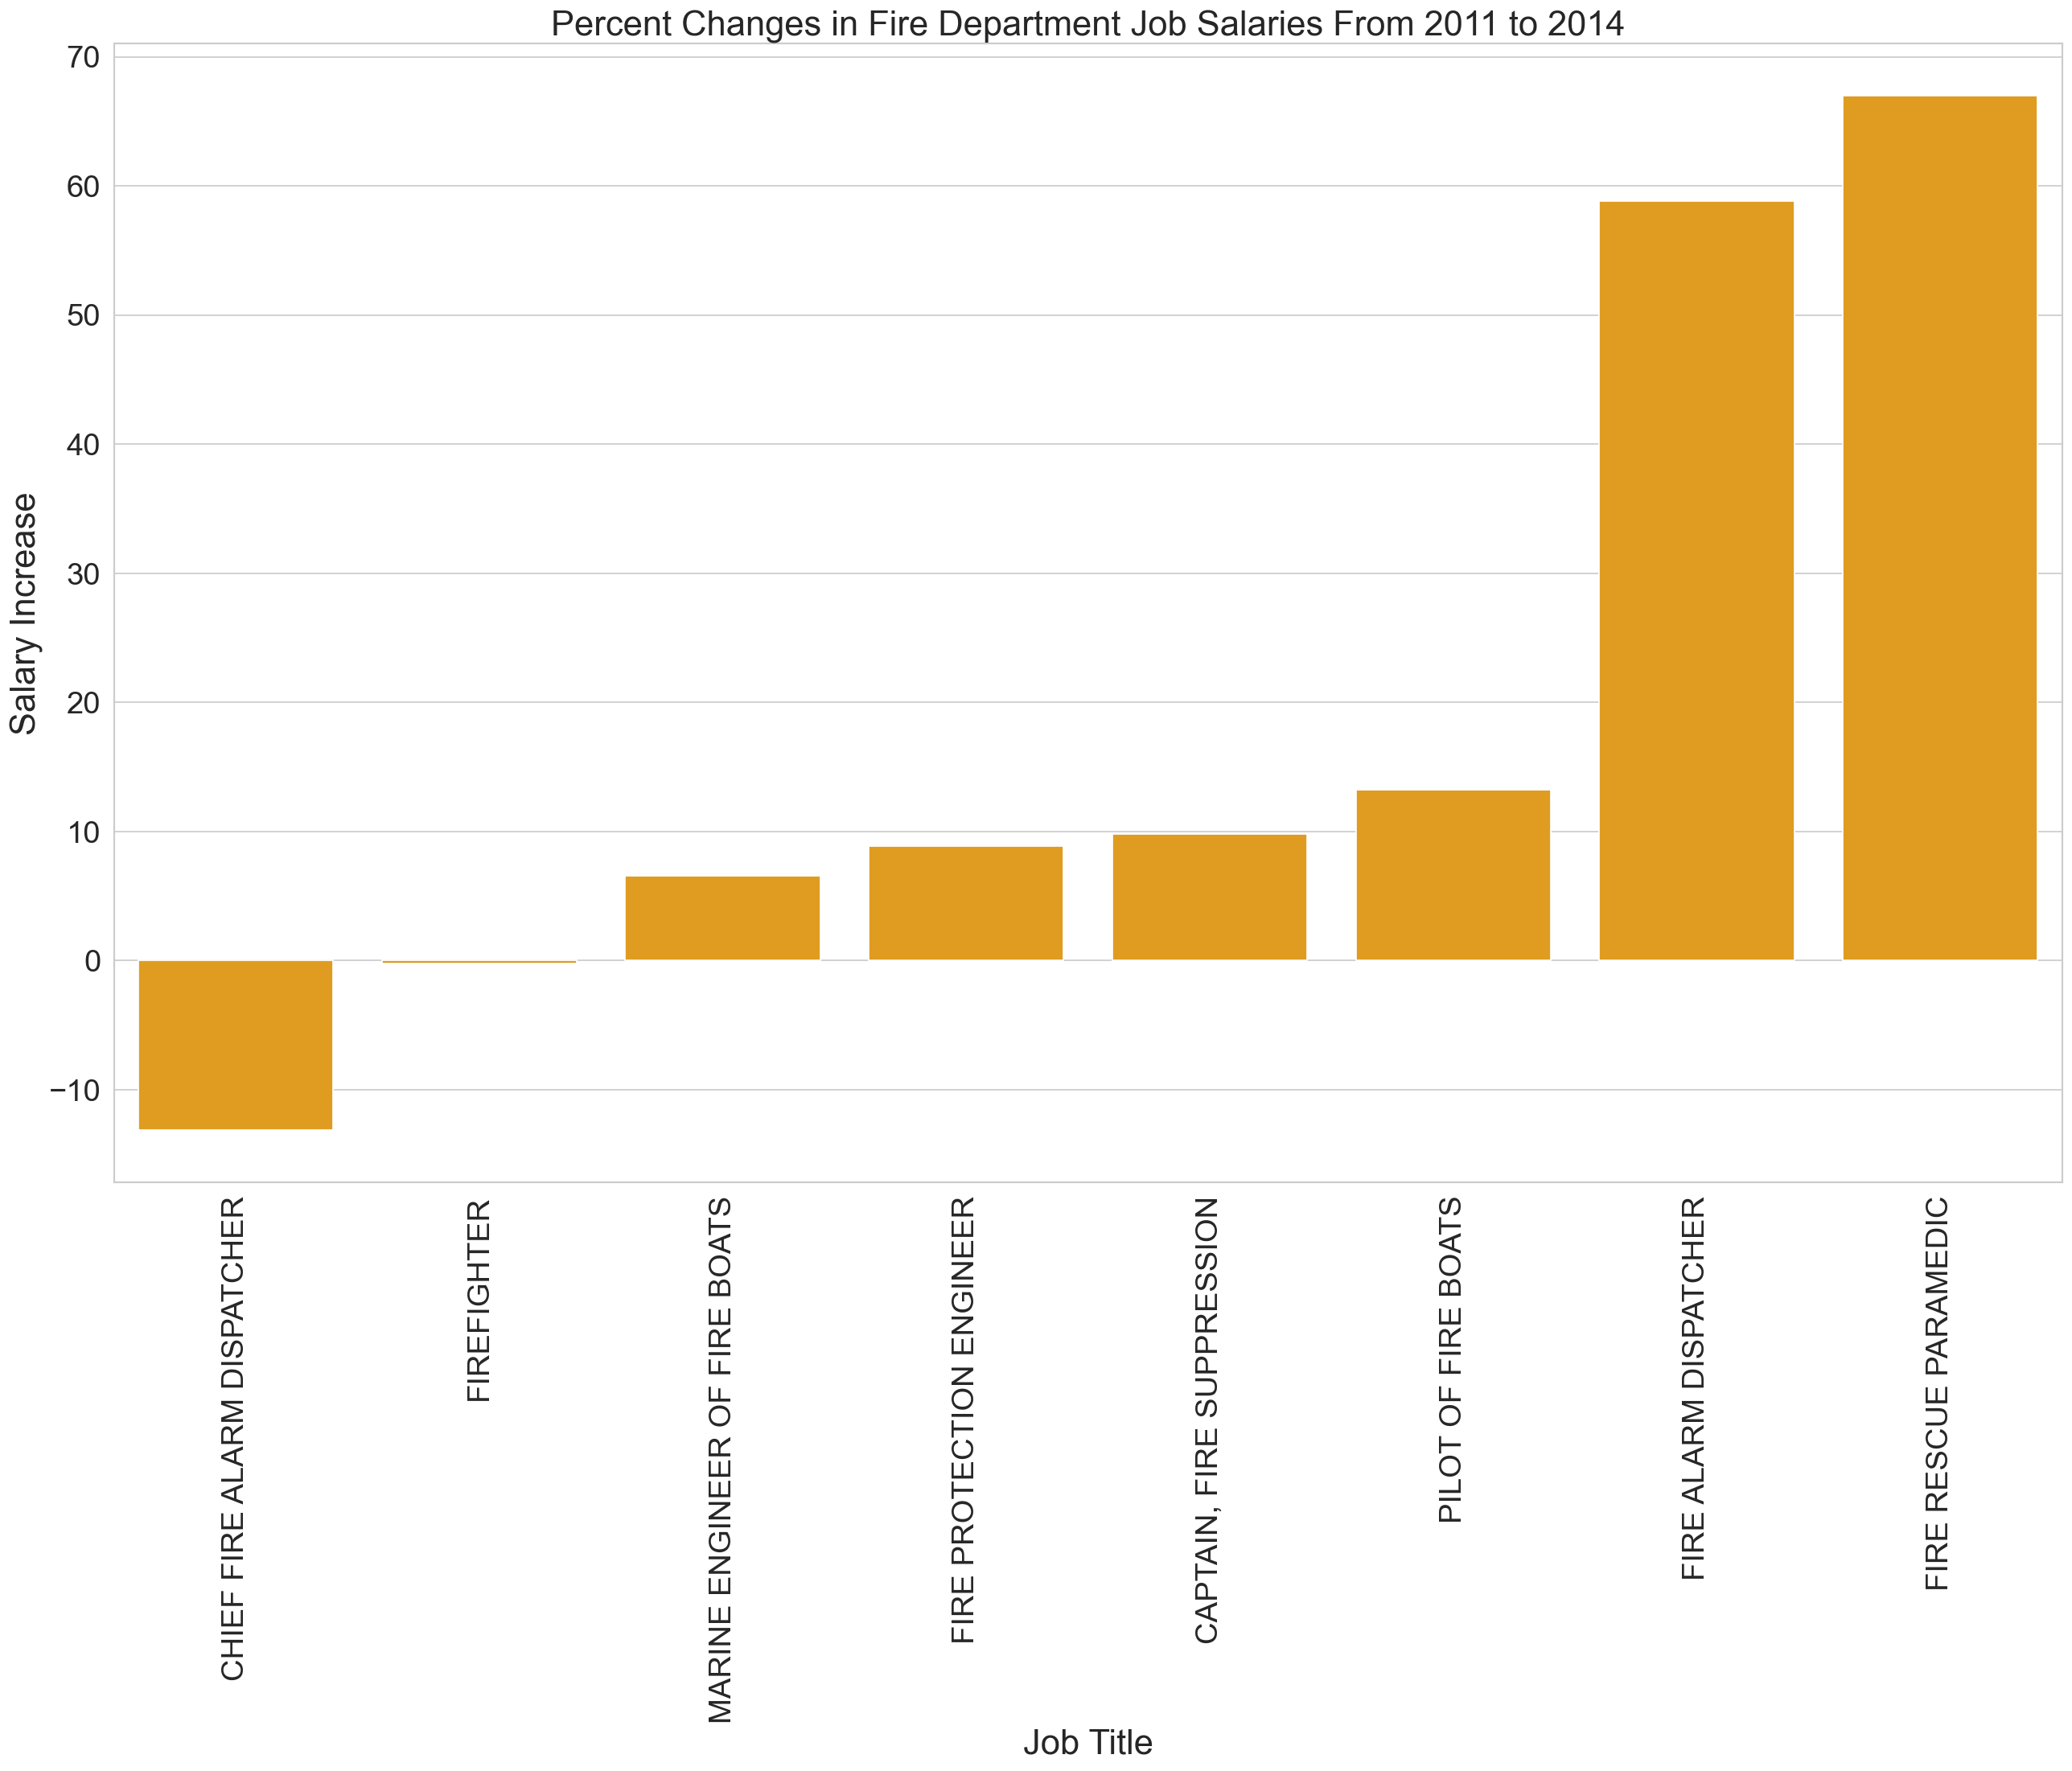

In [37]:
merged_agg11 = merged_agg11.sort_values('value')
sns.set(font_scale = 2)
sns.set_style('whitegrid')
plt.figure(figsize=[25,15])
plot11 = sns.barplot(x = 'JobTitle', y = 'value', data = merged_agg11, color = 'Orange')
plt.xticks(rotation = 90)
plot11.set_xlabel("Job Title", fontsize = 25)
plot11.set_ylabel("Salary Increase", fontsize = 25)
plot11.set_title("Percent Changes in Fire Department Job Salaries From 2011 to 2014", fontsize = 25)
plt.show()

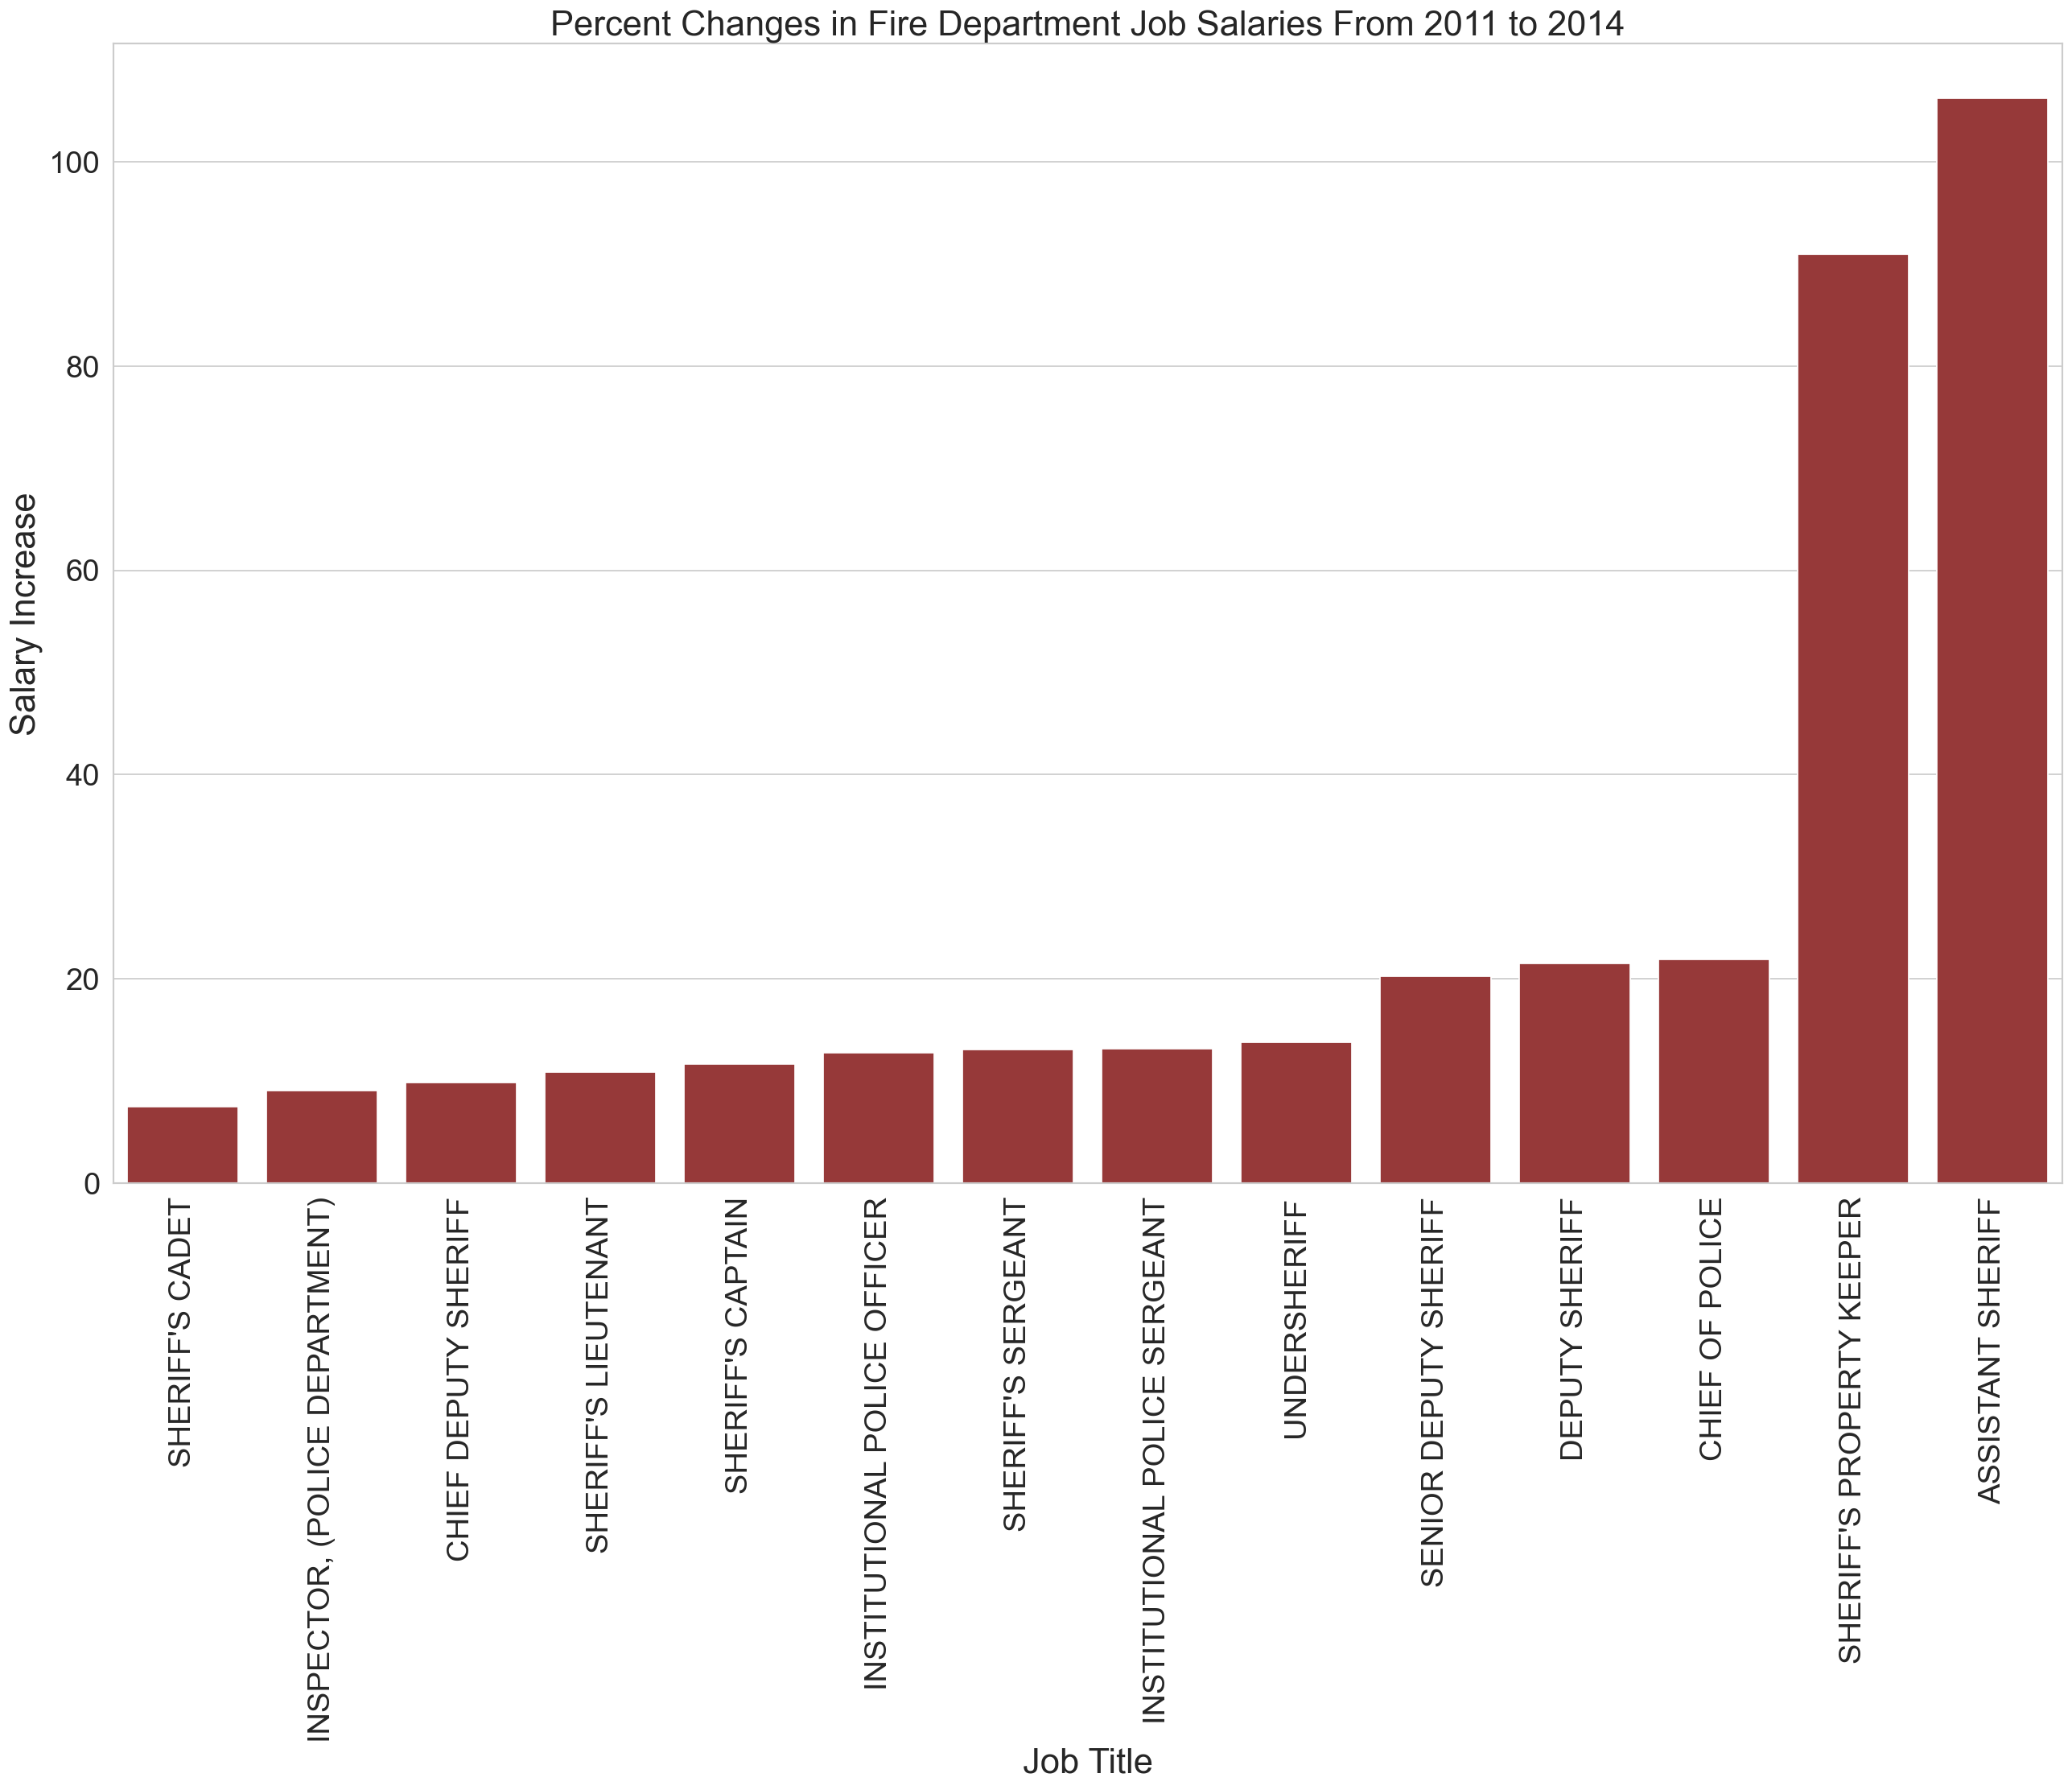

In [36]:
merged_agg12 = merged_agg12.sort_values('value')
sns.set(font_scale = 2)
sns.set_style('whitegrid')
plt.figure(figsize=[25,15])
plot12 = sns.barplot(x = 'JobTitle', y = 'value', data = merged_agg12, color = 'Brown')
plt.xticks(rotation = 90)
plot12.set_xlabel("Job Title", fontsize = 25)
plot12.set_ylabel("Salary Increase", fontsize = 25)
plot12.set_title("Percent Changes in Police Department Job Salaries From 2011 to 2014", fontsize = 25)
plt.show()